# Perlin-noise generator

This notebook is used to generate an image of perlin noise, which can be used and has been used in my thesis, to model TEM images of amorphous films, including a carbon film and a silicon nitride film. 

## Install Perlin-noise package

In [4]:
pip install perlin-noise

Note: you may need to restart the kernel to use updated packages.


## Import dependancies

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from perlin_noise import PerlinNoise
from SimpliPyTEM.Micrograph_class import Micrograph
plt.gray()

<Figure size 640x480 with 0 Axes>

## Create image

This code comes almost entirely from the [perlin-noise PyPi page](https://pypi.org/project/perlin-noise/). The octaves and xy sizes (xpix, ypix) can be adjusted to taste. I have used large octive values to produce small scale fluctuations. 

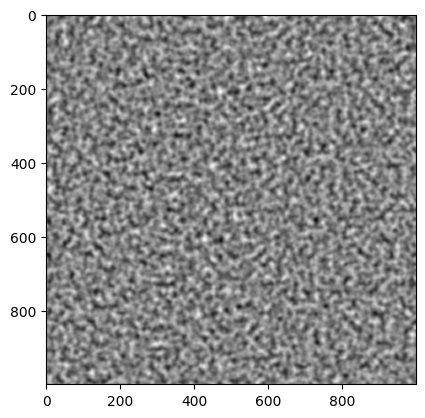

In [38]:
noise1 = PerlinNoise(octaves=50)
noise2 = PerlinNoise(octaves=69)
noise3 = PerlinNoise(octaves=80)
noise4 = PerlinNoise(octaves=100)

xpix, ypix = 1000, 1000
pic = []
for i in range(xpix):
    row = []
    for j in range(ypix):
        noise_val = noise1([i/xpix, j/ypix])
        noise_val += 0.5 * noise2([i/xpix, j/ypix])
        noise_val += 0.25 * noise3([i/xpix, j/ypix])
        noise_val += 0.125 * noise4([i/xpix, j/ypix])

        row.append(noise_val)
    pic.append(row)
pic = np.array(pic)
plt.imshow(pic, cmap='gray')
plt.show()

## Use SimpliPyTEM to scale the picture between 0-255 (8bit) 

In [42]:
im = Micrograph()
im.image = pic.copy()
im = im.convert_to_8bit()

## Add some gaussian noise to dampen the signal

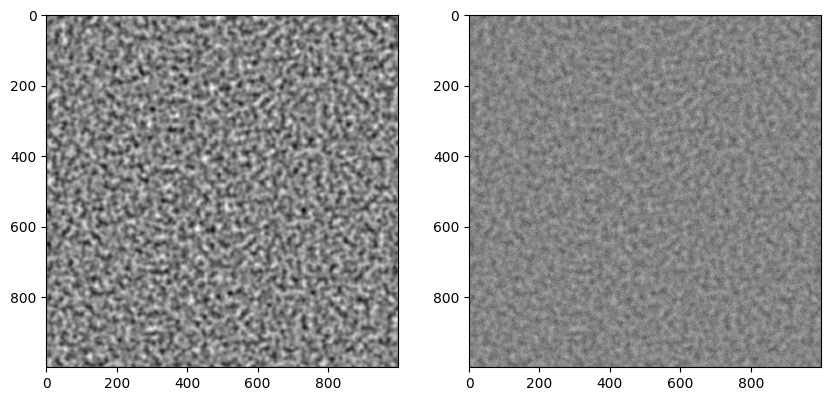

In [44]:
# Add Gaussian noise
noise = np.random.normal(loc=50, scale=70, size=pic.shape)
noisy_img = im.image + noise

# Show original and noisy images
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow( pic)
ax[1].imshow( noisy_img)
plt.show()

im2 = Micrograph()
im2.image = noisy_img


## Use SimpliPyTEM to enhance contrast and save image

Saturation =  0.2
Maxmium value :  208.0
Minimum value :  54.0
Perlin_noise_example.jpg Done!


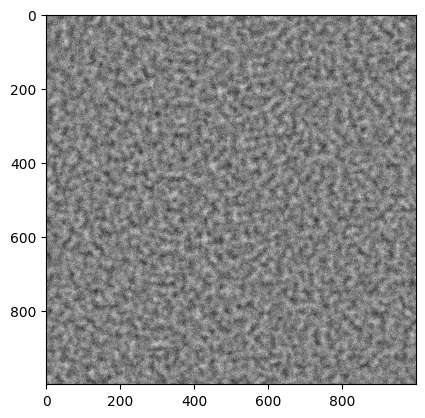

In [49]:
im2 = Micrograph()
im2.image = noisy_img.copy()
im2 = im2.clip_contrast()
plt.imshow(im2.image)
im2_cc.write_image('Perlin_noise_example.jpg')